In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [203]:
df = pd.read_csv(r"C:\Users\colin\Downloads\Data Science Job Posts - Sheet1.csv")

print(df.columns)


Index(['First and Last Name', 'Unnamed: 1',
       'Source (Indeed, Linkedin, company site, usajobs...)', 'Job title',
       'Job Type (full, part time, hourly)', 'Company Name', 'Location',
       'Remote/hybrid/onsite', 'Date Posted', 'Job post link (url)',
       'Job description (raw) - summary information about the role',
       'Education required (High School/Bachelor/Masters)',
       'years experience required', 'Responsibilities/Duties (what you'll do)',
       'Qualifications (raw)', 'Required qualifications',
       'Preferred Qualifications', 'salary range (annual)'],
      dtype='str')


In [204]:
#number of job postings
num_rows = len(df)

print(f"There are {num_rows} rows")

There are 98 rows


In [205]:
#unique companies
unique_companies = df["Company Name"].unique()

num_uniques = len(unique_companies)

print(f"There are {num_uniques} unique companies")

There are 90 unique companies


In [206]:
#unique job titles
unique_titles = df["Job title"].unique()

num_unique_titles = len(unique_titles)

print(f"There are {num_unique_titles} unique job titles")

There are 69 unique job titles


In [207]:
null_count = df.isna().sum().sum()

print(f"There are {null_count} null values in the dataframe")

There are 138 null values in the dataframe


In [208]:
#clean job location column
col = "Remote/hybrid/onsite"

for i in range(len(df)):
    df.iloc[i,df.columns.get_loc(col)] = str(df.iloc[i][col]).lower()

#manipulate 'if "" in' to clean the data

for i in range(len(df)):
    if "hybrid" in str(df.iloc[i][col]):
        df.loc[i,col] = "hybrid"

print(df[col].unique())

<StringArray>
['on site', 'hybrid', 'onsite', 'on-site', 'in office', 'remote', 'onsite`']
Length: 7, dtype: str


In [209]:
#clean education column

col = "Education required (High School/Bachelor/Masters)"

for i in range(len(df)):
    df.iloc[i,df.columns.get_loc(col)] = str(df.iloc[i][col]).lower()

for i in range(len(df)):
    if "not" in str(df.iloc[i][col]):
        df.loc[i,col] = None
    

print(df[col].unique())

<StringArray>
[                                                                                                                                'bachelors or higher',
                                                                                                                      'bachelors, masters (preferred)',
                                                                                                                                           'bachelors',
                                                                                                                         'bachelor's, prefer master's',
                                                                                                                                 'bachelor's, masters',
                                                                                                                                          'bachelor's',
                                                                          

In [210]:
#savestate for cleaning

df.to_csv("checkpoint.csv")

In [211]:
#clean salary column

df = pd.read_csv("checkpoint.csv")

col = "salary range (annual)"

for i in range(len(df)):
    if "nan" in str(df.iloc[i][col]):
        df.loc[i,col] = None

print(df[col].unique())

df[col] = (df[col].str.replace(r'[kK]', "000", regex=True).str.replace("–","-").str.replace("to","-").str.replace(r'(\.).{2}', "", regex=True).str.replace(r'[^0-9-]',"", regex=True))
            

# for i in range(len(df)):
#     df.iloc[i,df.columns.get_loc(col)] = str(df.iloc[i][col]).split("-")

# for i in range(len(df)):
#     if "/" in str(df.iloc[i][col]):
#         df.loc[i,col] = "hybrid"

print(df[col].unique())

<StringArray>
[              '$75,246.10 - $90,618.96',
              '$64,890.00 - $158,620.00',
                  '$70,000.00 - $85,000',
                                     nan,
             '$102,220.00 - $133,194.00',
                       '$52000 - $62400',
                       '$62400 - $83200',
                         'Not specified',
                 '$50,000.00-$60,000.00',
                '$79,200.00-$118,800.00',
               '$181,100.00-$272,100.00',
        '$82,000.00/yr - $100,000.00/yr',
            '$150,000 - $175,000 a year',
    '$130,000.00 - $150,000.00 per year',
             '$142,100.00 – $213,100.00',
                 ' $114,000 to $150,000',
                     '$100,000-$180,000',
                            '$29.25-$48',
                        '$75000-$113000',
                       '$126500-$299500',
                    '$40.87-$45.18/hour',
              '$92,100.00 - $136,000.00',
   '$87,362 - $197,200 (Entry - Expert)',
                    

In [212]:
#create the new columns for salary min and max

parts = df[col].str.split('-', n=1, expand=True)

min_str = parts[0].replace('', np.nan)

max_str = parts[1].replace('', np.nan).fillna(min_str)

min_num = pd.to_numeric(min_str.str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
max_num = pd.to_numeric(max_str.str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

df["Minimum Salary"] = min_num
df["Maximum Salary"] = max_num



In [213]:
#convert hourly and monthly pay to yearly salary

minimum = "Minimum Salary"
maximum = "Maximum Salary"

df[minimum] = pd.to_numeric(df[minimum], errors='coerce')
df[maximum] = pd.to_numeric(df[maximum], errors='coerce')

valid_mask = df[minimum].notna() & df[maximum].notna()

hourly_mask = valid_mask & (df[minimum] < 100)

monthly_mask = valid_mask & (df[minimum] >= 100) & (df[minimum] < 20000)

df.loc[hourly_mask, minimum] *= 2000
df.loc[hourly_mask, maximum] *= 2000

df.loc[monthly_mask, minimum] *= 12
df.loc[monthly_mask, maximum] *= 12

print(df[[minimum, maximum]].head(30))


    Minimum Salary  Maximum Salary
0          75246.0         90618.0
1          64890.0        158620.0
2          70000.0         85000.0
3              NaN             NaN
4         102220.0        133194.0
5              NaN             NaN
6              NaN             NaN
7          52000.0         62400.0
8          62400.0         83200.0
9              NaN             NaN
10         50000.0         60000.0
11         79200.0        118800.0
12        181100.0        272100.0
13         82000.0        100000.0
14             NaN             NaN
15             NaN             NaN
16        150000.0        175000.0
17        130000.0        150000.0
18        142100.0        213100.0
19        114000.0        150000.0
20        100000.0        180000.0
21         58000.0         96000.0
22         75000.0        113000.0
23        126500.0        299500.0
24         80000.0         90000.0
25         92100.0        136000.0
26         87362.0        197200.0
27         66900.0  

In [214]:
#clean years of experience

col = "years experience required"

df[col] = df[col].str[0]

nan_mask = df[col].str.fullmatch(r'[^0-9]')

df.loc[nan_mask,col] = np.nan

df[col] = df[col].astype(float)


In [215]:
print(df[col])

0     0.0
1     1.0
2     0.0
3     5.0
4     3.0
     ... 
93    1.0
94    NaN
95    5.0
96    NaN
97    3.0
Name: years experience required, Length: 98, dtype: float64


In [216]:
'''
The first thing I did was create a jupyter notebook and import a csv of the data. 
I then performed some basic describing of the dataframe to find the number of rows and number of unique entries in certain columns. 
I then started to clean the required columns. I had the same general approach to each column. 
For the job location column, I turned all the characters to lowercase characters, 
then I used the unique() method to keep looking for slight differences in the entries and whittled the options down to 3, 
onsite, hybrid, and remote. 
Then I did the education column and used the same approach. 
There were a lot of entries that had a degree and the next level degree in the same entry, and for those entries I took the lower qualification as the minimum. 
Then I cleaned the numeric value columns, salary and years experience.
For the salary column I split the ranges into minimum and maximum after splitting on the dash in every entry. 
Then replaced many symbols with '' and k with '000'. I then turned the values into floats and made the empty values np.nan. 
Finally the years of experience was very simple. I took the first digit of all the ranges, because it wants the minimum not preferred. 
Then turn anything that isn't a digit into np.nan.
'''

"\nThe first thing I did was create a jupyter notebook and import a csv of the data. \nI then performed some basic describing of the dataframe to find the number of rows and number of unique entries in certain columns. \nI then started to clean the required columns. I had the same general approach to each column. \nFor the job location column, I turned all the characters to lowercase characters, \nthen I used the unique() method to keep looking for slight differences in the entries and whittled the options down to 3, \nonsite, hybrid, and remote. \nThen I did the education column and used the same approach. \nThere were a lot of entries that had a degree and the next level degree in the same entry, and for those entries I took the lower qualification as the minimum. \nThen I cleaned the numeric value columns, salary and years experience.\nFor the salary column I split the ranges into minimum and maximum after splitting on the dash in every entry. \nThen replaced many symbols with '' an

In [217]:
print(df.columns)

Index(['Unnamed: 0', 'First and Last Name', 'Unnamed: 1',
       'Source (Indeed, Linkedin, company site, usajobs...)', 'Job title',
       'Job Type (full, part time, hourly)', 'Company Name', 'Location',
       'Remote/hybrid/onsite', 'Date Posted', 'Job post link (url)',
       'Job description (raw) - summary information about the role',
       'Education required (High School/Bachelor/Masters)',
       'years experience required', 'Responsibilities/Duties (what you'll do)',
       'Qualifications (raw)', 'Required qualifications',
       'Preferred Qualifications', 'salary range (annual)', 'Minimum Salary',
       'Maximum Salary'],
      dtype='str')


<Axes: xlabel='Job title'>

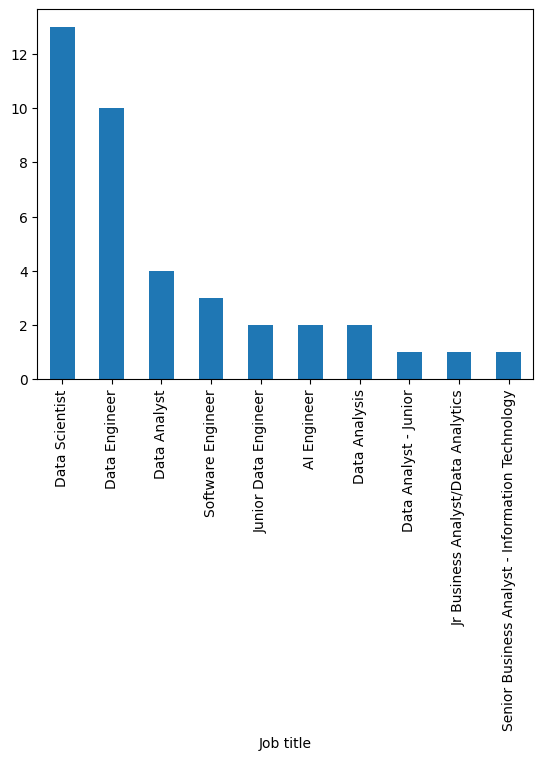

In [218]:
col = "Job title"
job_freqs = pd.Series(df[col]).value_counts().head(10)
job_freqs.plot(kind='bar')

In [235]:
#clean job source data
col = "Source (Indeed, Linkedin, company site, usajobs...)"
for i in range(len(df)):
    df.iloc[i,df.columns.get_loc(col)] = str(df.iloc[i][col]).lower()

#manipulate 'if "" in' to clean the data

for i in range(len(df)):
    if "link" in str(df.iloc[i][col]):
        df.loc[i,col] = "linkedin"

print(df[col].unique())


<StringArray>
[         'indeed',    'company site',        'linkedin',       'handshake',
  'toyota careers', 'simplex careers',     'ibm careers',   'apple careers',
           'tallo',     'simplyhired',         'usajobs',            'dice',
     'amazon jobs']
Length: 13, dtype: str


<Axes: xlabel='Source (Indeed, Linkedin, company site, usajobs...)'>

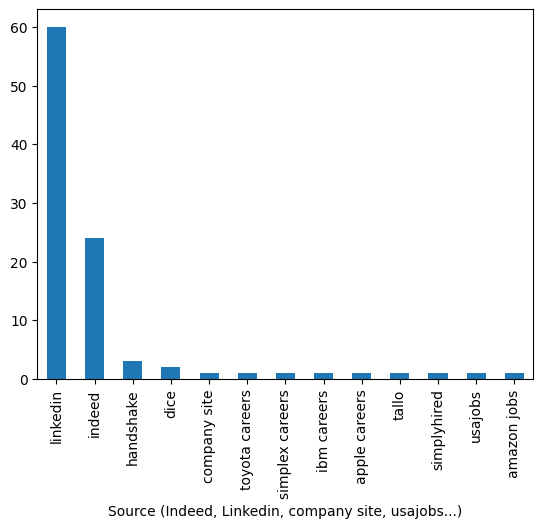

In [236]:
col = "Source (Indeed, Linkedin, company site, usajobs...)"

job_sources = pd.Series(df[col]).value_counts()
job_sources.plot(kind='bar')

<Axes: xlabel='Location'>

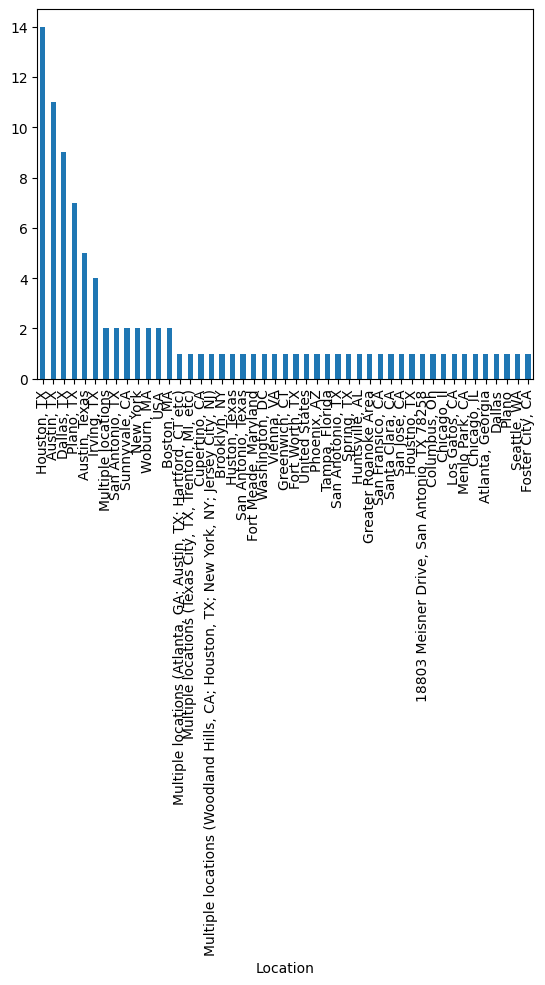

In [ ]:
#sort by city(less helpful but more complete)
col = "Location"

job_sources = pd.Series(df[col]).value_counts()
job_sources.plot(kind='bar')

0     TX
1     C)
2     TX
3     TX
4     TX
      ..
93    MA
94    CA
95    TX
96    TX
97    TX
Name: Location, Length: 98, dtype: str


<Axes: xlabel='Location'>

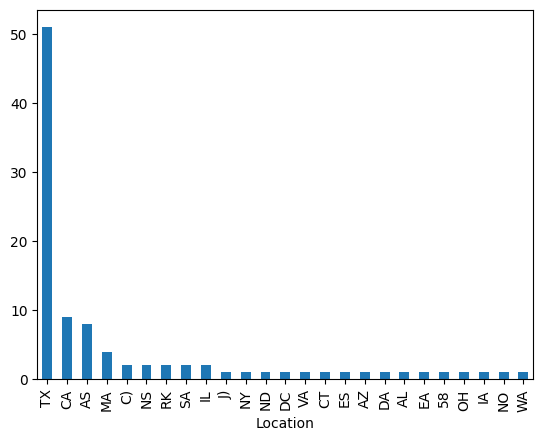

In [234]:
#sort by states (a decent amount of data will probably be lost)

col = "Location"

locations = pd.Series(df[col])

for i in range(len(locations)):
    locations[i] = locations[i].upper()
    locations[i] = locations[i][-2:]

print(locations)

job_sources = pd.Series(locations).value_counts()
job_sources.plot(kind='bar')

In [237]:
'''
The roles that dominate the dataset are data scientist roles, whether that's engineer, analyst, are scientist. 
Another big pattern is junior roles tend to be preferred, probably because the students care more about internships and junior roles instead of senior positions.
Linkedin had by far the most contributions from a site, with indeed in a comfortable second and third place being far behind both.
The job postings are most concentrated in texas, which makes sense because we are in Texas so goegraphic filters on the sites will push Texas jobs more,
and many of the students here are likely from Texas.


'''

"\nThe roles that dominate the dataset are data scientist roles, whether that's engineer, analyst, are scientist. \nAnother big pattern is junior roles tend to be preferred, probably because the students care more about internships and junior roles instead of senior positions.\nLinkedin had by far the most contributions from a site, with indeed in a comfortable second and third place being far behind both.\nThe job postings are most concentrated in texas, which makes sense because we are in Texas so goegraphic filters on the sites will push Texas jobs more,\nand many of the students here are likely from Texas.\n\n\n"

data                264
experience          161
years                89
Data                 73
degree               72
                   ... 
modeling;             1
Translating           1
decision-making;      1
Synthesizing          1
presenting            1
Name: count, Length: 3609, dtype: int64


) missing from font(s) DejaVu Sans.N489_assignment\venv\Lib\site-packages\IPython\core\events.py:96: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.N489_assignment\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


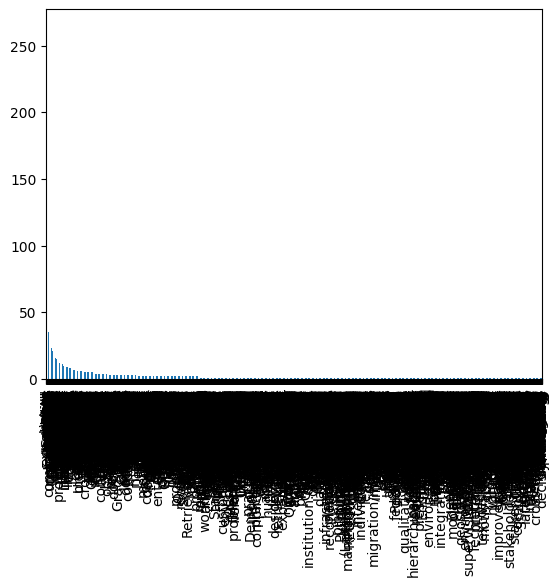

In [288]:
col = "Qualifications (raw)"

raw_series = pd.Series(df[col])

raw_list = []

for i in range(len(raw_series)):
    for j in raw_series[i]:
        raw_list.append(j)

raw_word_list = "".join(raw_list)

final_list = raw_word_list.split(" ")

final_series = pd.Series(final_list).value_counts()#.head(40)

ignore_words = ['and', 'with', 'in', 'or','to','of','a','the','as','for','such', "", "is"]

final_series.drop(labels=ignore_words, inplace=True, errors='ignore')

final_series.plot(kind='bar')

print(final_series)



In [ ]:
'''
The top 5 skills by frequency count from raw qualifications columns - counts:
1.Python - 61
2.machine learning (machine and learning are right next to each other so I think its safe to say they are almost always together) - 36
3.communication - 33
4.SQL - 32
5.programming - 28
'''

SQL            32
Python         32
programming    28
AWS            12
leadership      6
TensorFlow      1
Name: count, dtype: int64


<BarContainer object of 2 artists>

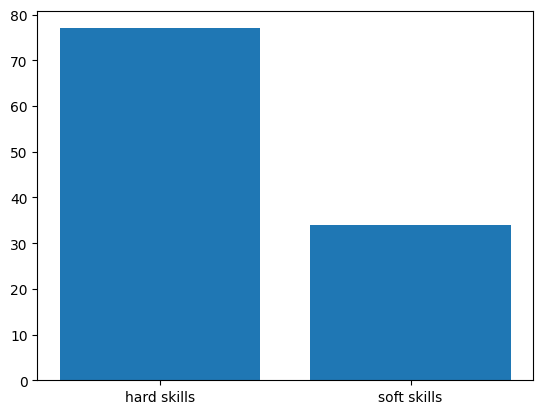

In [ ]:
col = "Qualifications (raw)"

skills = ['Python','SQL','machine learning', 'AWS', 'TensorFlow','communcation','programming','leadership']
hard_skills = ['Python','SQL','machine learning', 'AWS', 'TensorFlow']
soft_skills = ['communcation','programming','leadership']

sub_series = final_series

sub_series = final_series[final_series.index.isin(skills)]

print(sub_series)

hard_count = final_series[final_series.index.isin(hard_skills)].sum()
soft_count = final_series[final_series.index.isin(soft_skills)].sum()

plt.figure()
plt.bar(["hard skills", "soft skills"],[hard_count, soft_count])

In [ ]:
'''
The most common skills are programming skills, which is expected because these are programming positions. 
The specific languages that came up the most are python and SQL. 
Certain roles don't really emphasize different skills, it appears to be more a mix of the same ones mixed in different quantities. 
The skills being python, SQL, communication, and general programming skills. 
The more technically intensive skills depend on the person, in my opinion.
Because some skills come easier to others. While programming is a mandatory skill for these positions, lack of communication and teamwork can make you ineffective.
The roles that more emphasize soft skills are the more junior skills because hard skills aren't as highly expected from junior engineers.
There is definitely a difference in role expectations between roles because there is a mix of senior and junior roles in the dataset.
The differences are in level of experience, and range of skills.
'''